# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
test = "http://api.openweathermap.org/data/2.5/weather?appid=weather_api_key&q=Sydney"
requests.get(test)


<Response [401]>

In [4]:
city= 'silver springs'
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
city_url = query_url + city
city_weather = requests.get(query_url + city).json()
pprint(city_weather)
print(city_weather['clouds']['all'])

{'base': 'stations',
 'clouds': {'all': 76},
 'cod': 200,
 'coord': {'lat': 29.1044, 'lon': -82.0206},
 'dt': 1683782283,
 'id': 4173007,
 'main': {'feels_like': 21.74,
          'humidity': 80,
          'pressure': 1018,
          'temp': 21.45,
          'temp_max': 22.78,
          'temp_min': 20.52},
 'name': 'Silver Springs',
 'sys': {'country': 'US',
         'id': 2009446,
         'sunrise': 1683801546,
         'sunset': 1683850194,
         'type': 2},
 'timezone': -14400,
 'visibility': 10000,
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 64, 'gust': 5.14, 'speed': 2.34}}
76


In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
       
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
           
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

requests.get(test)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tazacorte
Processing Record 2 of Set 1 | katsuren-haebaru
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | brady
Processing Record 5 of Set 1 | jagdalpur
Processing Record 6 of Set 1 | mocimboa
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | cooma
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | selty
Processing Record 12 of Set 1 | qaqortoq
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | rexburg
Processing Record 15 of Set 1 | west island
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | keflavik
Processing Record 19 of Set 1 | ca mau
Processing Record 20 of Set 1 | college
Processing Record 21 of Set 1 | alexandria
Processing Record 22 of Set 1 | bredasdorp
Processing R

<Response [401]>

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tazacorte,28.6290,-17.9293,20.08,74,0,8.23,ES,1683782506
1,katsuren-haebaru,26.3369,127.8719,26.21,48,20,6.17,JP,1683782507
2,ribeira grande,38.5167,-28.7000,15.99,84,26,6.71,PT,1683782507
3,brady,31.1352,-99.3351,21.87,88,100,4.63,US,1683782220
4,jagdalpur,19.0667,82.0333,37.06,21,100,1.84,IN,1683781927


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tazacorte,28.6290,-17.9293,20.08,74,0,8.23,ES,1683782506
1,katsuren-haebaru,26.3369,127.8719,26.21,48,20,6.17,JP,1683782507
2,ribeira grande,38.5167,-28.7000,15.99,84,26,6.71,PT,1683782507
3,brady,31.1352,-99.3351,21.87,88,100,4.63,US,1683782220
4,jagdalpur,19.0667,82.0333,37.06,21,100,1.84,IN,1683781927


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

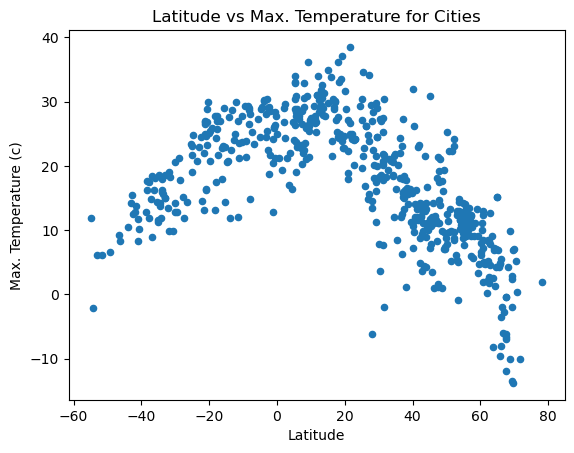

In [10]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter('Lat', 'Max Temp')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Max. Temperature (c)')
plt.title('Latitude vs Max. Temperature for Cities')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

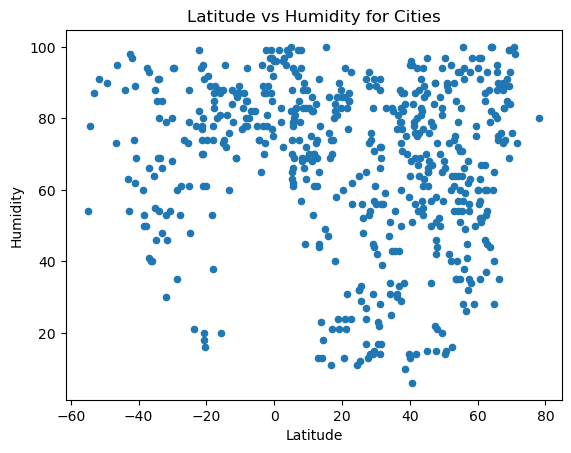

In [11]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter('Lat', 'Humidity')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity for Cities')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

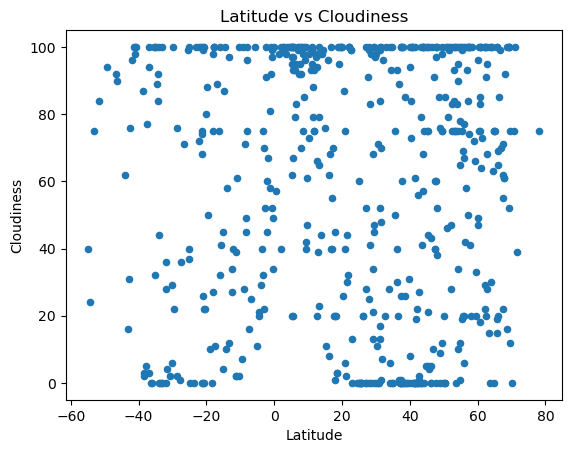

In [12]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter('Lat', 'Cloudiness')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

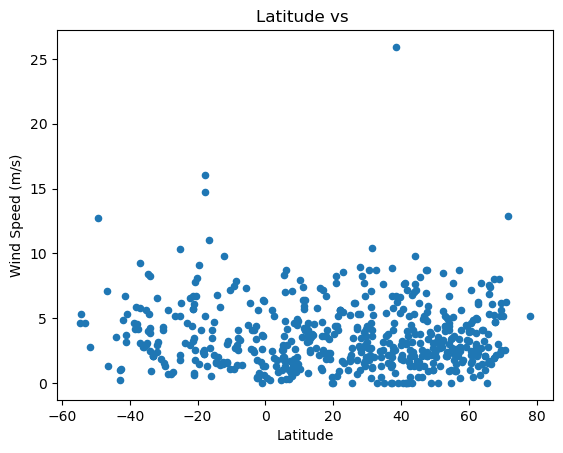

In [13]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter('Lat', 'Wind Speed')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (m/s)')
plt.title('Latitude vs ')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots
def regressor5000(x_values, y_values):
    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate regression values for the scatter plot
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    #print rvalue
    print(f"Rvalue = {rvalue}")

    # Plot scatter plot
    plt.scatter(x_values, y_values)

    # Plot regression line
    plt.plot(x_values, regress_values, "r-")

    # Annotate line equation on the plot
    plt.annotate(line_eq, (6, 10), fontsize=15, color="red")
    
    plt.show()
    # Return the regression coefficients and line equation string
    #return slope, intercept, line_eq

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tazacorte,28.6290,-17.9293,20.08,74,0,8.23,ES,1683782506
1,katsuren-haebaru,26.3369,127.8719,26.21,48,20,6.17,JP,1683782507
2,ribeira grande,38.5167,-28.7000,15.99,84,26,6.71,PT,1683782507
3,brady,31.1352,-99.3351,21.87,88,100,4.63,US,1683782220
4,jagdalpur,19.0667,82.0333,37.06,21,100,1.84,IN,1683781927


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,mocimboa,-11.3167,40.3500,23.62,87,39,2.99,MZ,1683782509
7,cooma,-36.2333,149.1333,16.27,40,0,2.80,AU,1683782510
8,edinburgh of the seven seas,-37.0676,-12.3116,14.79,66,100,9.29,SH,1683782511
9,hithadhoo,-0.6000,73.0833,28.43,77,99,6.37,MV,1683782511
12,port-aux-francais,-49.3500,70.2167,6.62,90,94,12.72,TF,1683782513


###  Temperature vs. Latitude Linear Regression Plot

Rvalue = -0.815475365526605


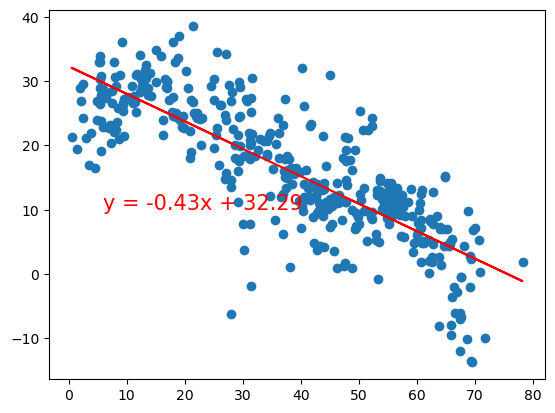

In [34]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

regressor5000(x_values, y_values)

Rvalue = 0.7629890577329016


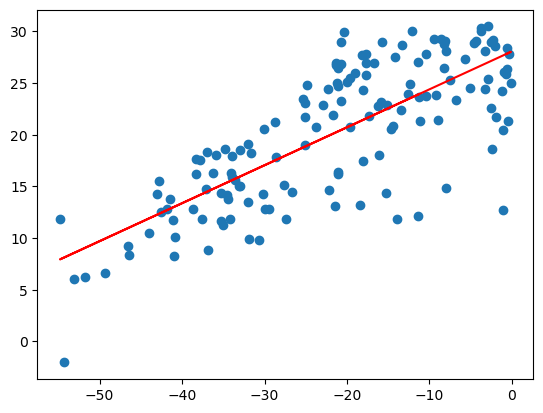

In [35]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

regressor5000(x_values, y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

Rvalue = -0.0020563789903403538


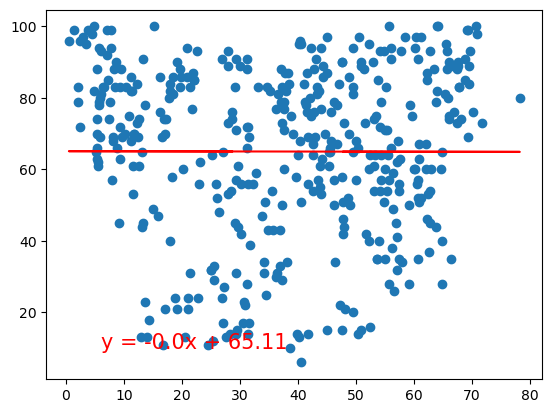

In [36]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

regressor5000(x_values, y_values)

Rvalue = 0.26161923978418317


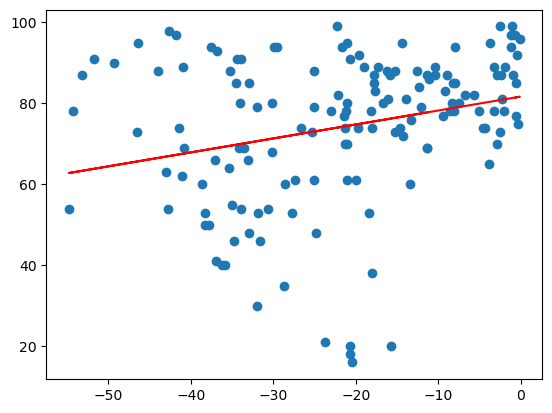

In [37]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

regressor5000(x_values, y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

Rvalue = -0.0798712998671761


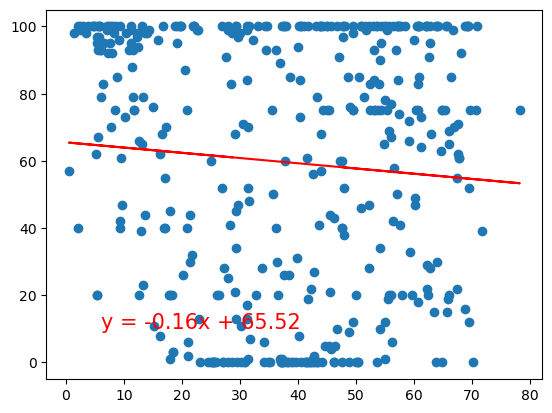

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

regressor5000(x_values, y_values)

Rvalue = 0.008439373305609692


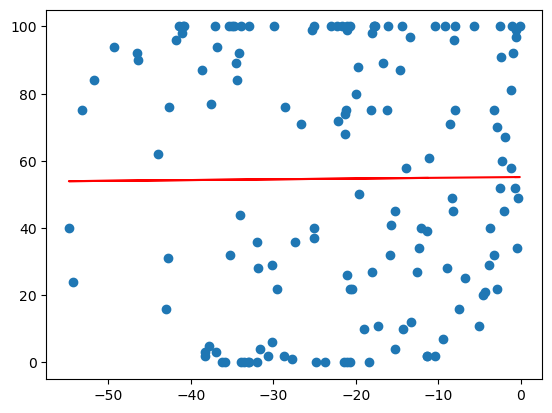

In [39]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

regressor5000(x_values, y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

Rvalue = 0.05679710547323402


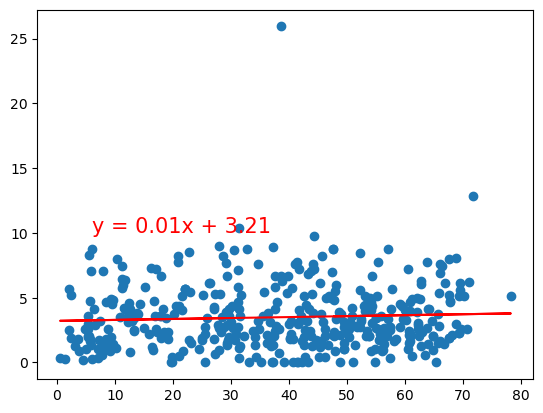

In [40]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

regressor5000(x_values, y_values)

Rvalue = -0.14081461944538676


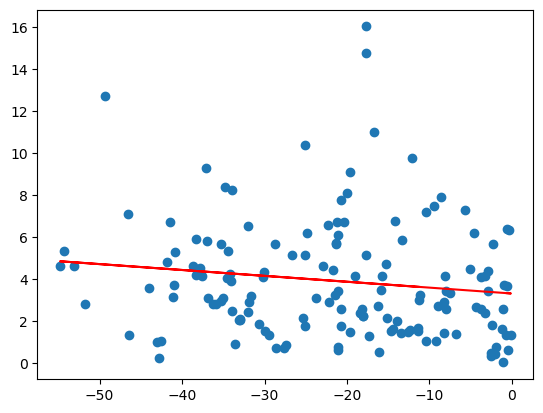

In [41]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

regressor5000(x_values, y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE